In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset Analysis

In [3]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
def species_dataset_df(dataset_folder, excel_file_path):
    species_dict = {}
    fish_type_list = ['Good', 'Bad']
    for species in os.listdir(dataset_folder):
        species_folder = os.path.join(dataset_folder, species)
        if not os.path.isdir(species_folder): continue
        fish_type_dict = {}
        for fish_type in tqdm(os.listdir(species_folder),
                              desc=f'Loading {species} data '):
            if fish_type not in fish_type_list: continue
            fish_type_folder = os.path.join(species_folder, fish_type)
            if not os.path.isdir(fish_type_folder): continue
            fish_type_count = len(os.listdir(fish_type_folder))
            fish_type_dict[fish_type] = fish_type_count
        species_dict[species.capitalize()] = fish_type_dict

    df = pd.DataFrame.from_dict(species_dict, orient='index').fillna(0).astype(int)
    df.sort_index(inplace=True)
    df.to_excel(excel_file_path, index=True)
    return df

In [5]:
# Species-wise data folder
dataset_folder = "/content/drive/MyDrive/Sowmya /qZense Dataset/Final Data"
excel_file_path = '/content/drive/MyDrive/Sowmya /Dataset EDA/Dataset_distribution.xlsx'
df = species_dataset_df(dataset_folder, excel_file_path)
df

Loading Siba data : 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]


,Good,Bad
Are,7,0
Barracuda,199,20
Basa,248,10
Bata,6,0
Black pomfret,224,7
Blue crab,470,1
Bolo,5,0
Boti macha,10,0
Catla,264,20
Chara pona,9,0


In [6]:
class EDA:
    def __init__(self, df):
        self.df = df

    def display_counts(self):
        # Calculate the counts
        self.total_count = self.df.sum().sum()
        print("Total images Count:", self.total_count)
        try:
            self.good_count = self.df['Good'].sum()
            print("Total Good images Count:", self.good_count)
        except:
            self.good_count = 0
            print("Total Good images Count:", self.good_count)
        try:
            self.bad_count = self.df['Bad'].sum()
            print("Total Bad images Count:", self.bad_count)
        except:
            self.bad_count = 0
            print("Total Bad images Count:", self.bad_count)
        self.species_count = self.df.shape[0]
        print("Total Number of Species:", self.species_count, "\n")

    def plot_data(self):
        self.display_counts()

        # Set the figure size
        plt.figure(figsize=(16,10))

        # Get the indices for x-axis
        x = np.arange(len(self.df.index))

        # Set the width of the bars
        bar_width = 0.40

        # Plot the bars for each column
        if self.good_count>0:
            plt.bar(x, self.df['Good'], width=bar_width, label='Good')
        if self.bad_count>0:
            plt.bar(x + bar_width, self.df['Bad'], width=bar_width, label='Bad')

        plt.xticks(x, self.df.index)
        plt.xlabel('Species')
        plt.ylabel('Images Count')
        plt.title(f'{self.df.shape[0]} Species Dataset')
        plt.legend()
        plt.xticks(rotation=90)
        plt.show()

Total images Count: 26416
Total Good images Count: 17919
Total Bad images Count: 8497
Total Number of Species: 50 



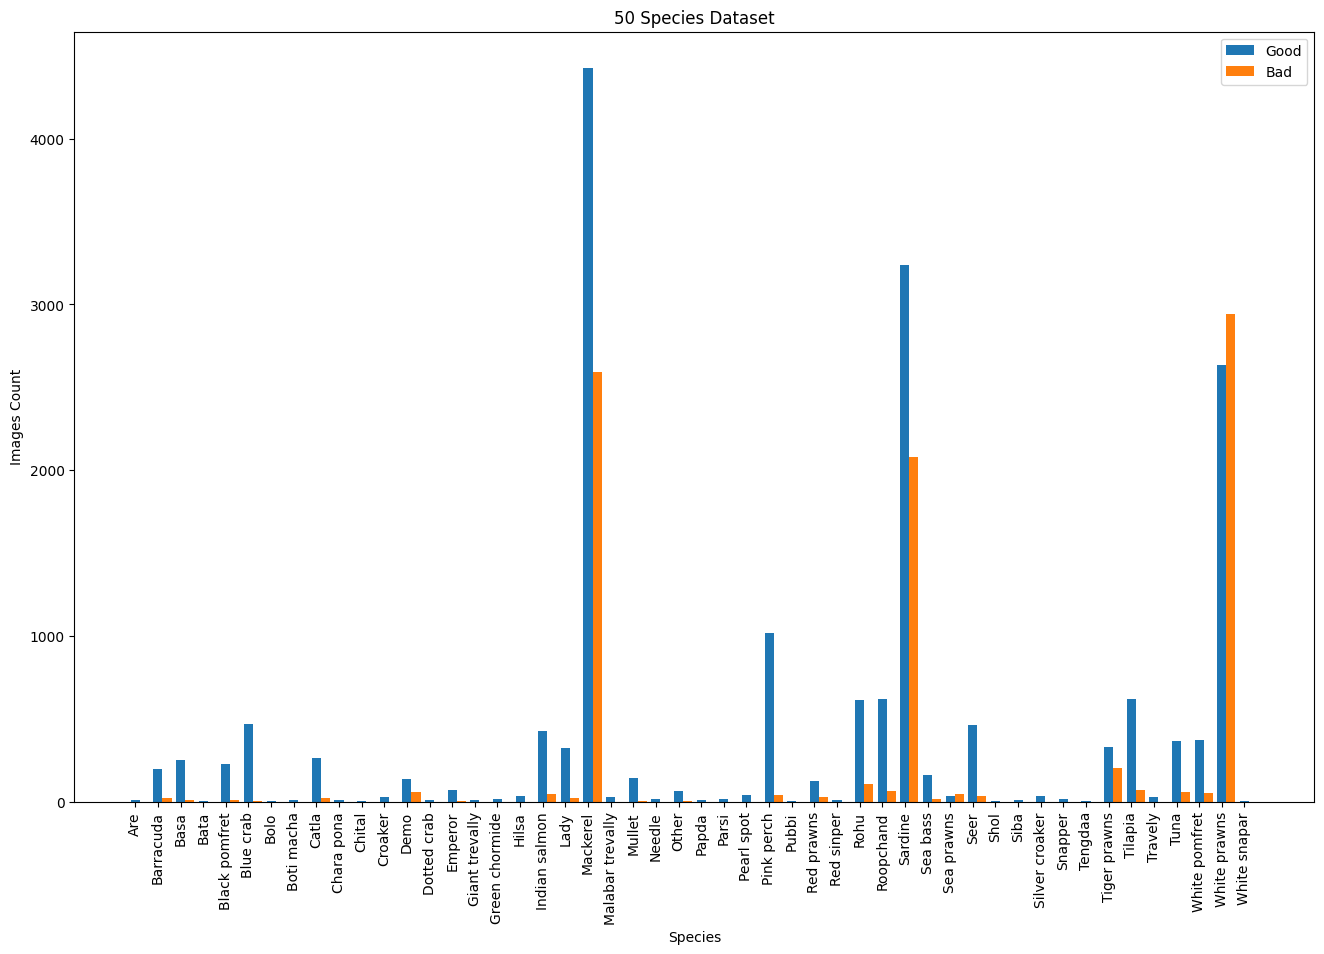

In [7]:
EDA(df).plot_data()

# Day-wise data of each species

In [8]:
class daywise_dataset_df:
    def __init__(self, dataset_folder, specific_date='',
                between_two_dates=False, start_date='', end_date=''):
        self.dataset_folder = dataset_folder
        self.specific_date = specific_date
        self.between_two_dates=between_two_dates
        self.start_date = start_date
        self.end_date=end_date

    def get_dates_list(self):
        dates_list = []
        if self.specific_date!='':
            dates_list.append(self.specific_date)
            return dates_list
        if self.between_two_dates:
            if (self.start_date!='') and (self.end_date!=''):
                for date in os.listdir(self.dataset_folder):
                    if not (start_date <= date <= end_date): continue
                    dates_list.append(date)
                return dates_list

    def get_df(self):
        dates_list = self.get_dates_list()
        species_dict = {}
        for date in dates_list:
            date_folder = os.path.join(self.dataset_folder, date)
            for species in os.listdir(date_folder):
                species_folder = os.path.join(date_folder, species)
                if not os.path.isdir(species_folder): continue
                fish_type_dict = {}
                for fish_type in tqdm(os.listdir(species_folder),
                                      desc=f'Loading {species} data '):
                    fish_type_folder = os.path.join(species_folder, fish_type)
                    if not os.path.isdir(fish_type_folder): continue
                    fish_type_count = len(os.listdir(fish_type_folder))
                    fish_type_dict[fish_type] = fish_type_count
                species_dict[species.capitalize()] = fish_type_dict

        df = pd.DataFrame.from_dict(species_dict, orient='index').fillna(0).astype(int)
        df.sort_index(inplace=True)
        return df

# Specific date dataset

In [10]:
specific_date = '2023-10-02'
dataset_folder = "/content/drive/MyDrive/Sowmya /qZense Dataset/S3 Data/Daily Data"
obj = daywise_dataset_df(dataset_folder=dataset_folder,
                         specific_date=specific_date)
df = obj.get_df()
df

Loading White prawns data : 100%|██████████| 2/2 [00:00<00:00,  5.31it/s]


,Bad,Good
Mackerel,38,24
White prawns,23,29


Total images Count: 114
Total Good images Count: 53
Total Bad images Count: 61
Total Number of Species: 2 



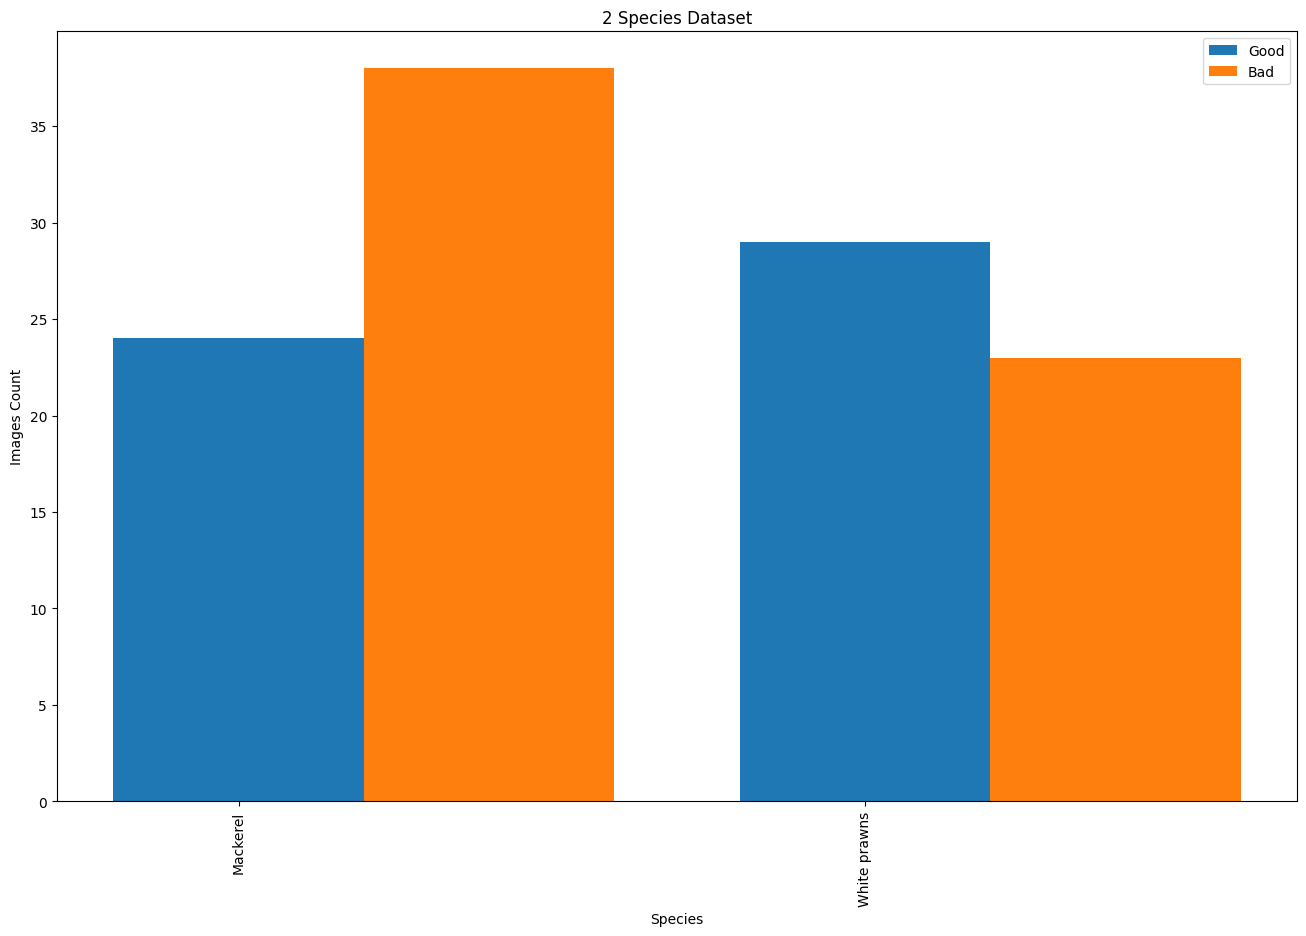

In [11]:
EDA(df).plot_data()

# Data between any two dates of each species

In [13]:
start_date = '2023-09-24'
end_date = '2023-10-02'
obj = daywise_dataset_df(dataset_folder=dataset_folder,
                         between_two_dates=True, start_date=start_date, end_date=end_date)
df = obj.get_df()
df

Loading White prawns data : 100%|██████████| 2/2 [00:00<00:00, 636.71it/s]


,Bad,Good
Blue crab,0,16
Indian salmon,0,2
Mackerel,38,24
Mullet,0,8
Pink perch,15,12
Red prawns,11,5
Rohu,0,4
Roopchand,0,6
Sardine,65,57
Seer,0,7


Total images Count: 329
Total Good images Count: 177
Total Bad images Count: 152
Total Number of Species: 12 



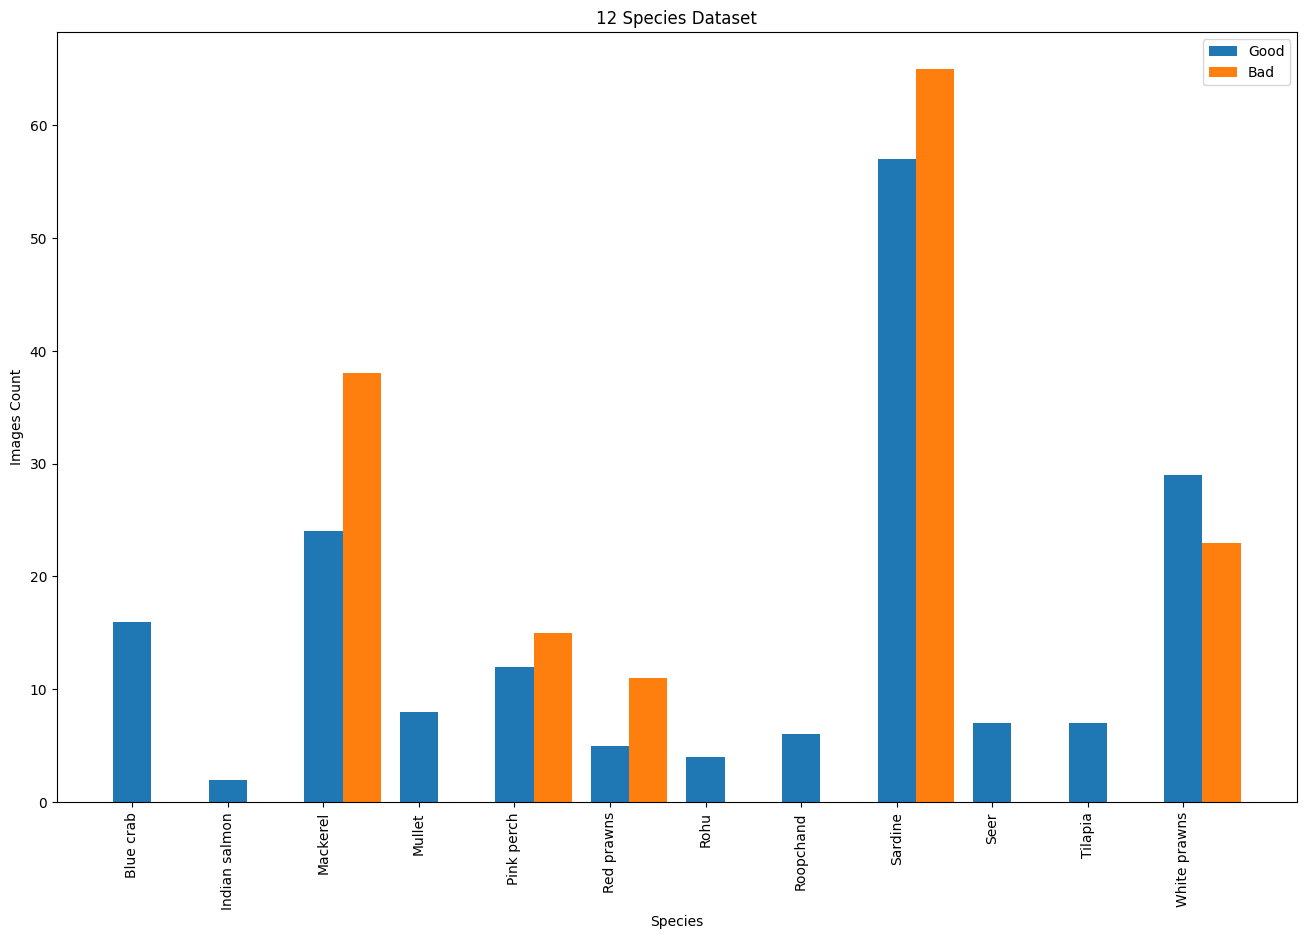

In [14]:
EDA(df).plot_data()